In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2024-09-27 17:56:43.968573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 17:56:44.004278: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 17:56:44.015989: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 17:56:44.041474: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 17:56:45.909964: W tensorflow/compiler/tf2

In [2]:
print(f"Dimensao do conjunto de treino: X - {train_images.shape} | Y - {train_labels.shape}")
print(f"Dimensao do conjunto de teste: X - {test_images.shape} | Y - {test_labels.shape}")

# Testando relacao indice x label
print(f"Test Label{np.unique(ar=train_labels)}")

Dimensao do conjunto de treino: X - (60000, 28, 28) | Y - (60000,)
Dimensao do conjunto de teste: X - (10000, 28, 28) | Y - (10000,)
Test Label[0 1 2 3 4 5 6 7 8 9]


In [3]:
# Normalizacao
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

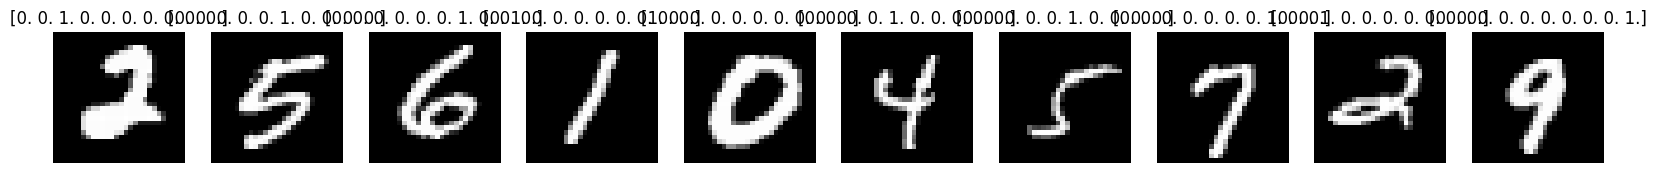

In [4]:
rand_idxs = np.random.choice(train_images.shape[0], 10, replace=False)

fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i, idx in enumerate(rand_idxs):
    axs[i].imshow(train_images[idx], cmap='gray')
    axs[i].set_title(train_labels[idx])
    axs[i].axis('off')

del rand_idxs, fig, axs, i, idx


## Treino com modelo básico (MLP)
O modelo à seguir utiliza 3 camadas
1. Entrada (Flatten)
2. Camada Oculta (singular) com 128 neurônios - ReLU
3. Camada de Saída com 10 neurônios - SoftMax

In [5]:
def build_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28), name='Entrada'),
        keras.layers.Dense(128, activation='relu', name='Oculta1-Densa'),
        keras.layers.Dense(10, activation='softmax', name='Saida')
    ])

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
        )

    return model

In [6]:
mod = build_model()
mod.summary()
mod.fit(x=train_images, y=train_labels, epochs=5, batch_size=32, verbose=0)
test_loss, test_acc = mod.evaluate(test_images, test_labels)
print(f'Acuracia dessa joça: {round(test_acc*100, 2)}%')
print(f'Loss dessa joça: {round(test_loss, 2)}')

/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Entrada (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Oculta1-Densa (Dense)           │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Saida (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0865
Acuracia dessa joça: 97.64%
Loss dessa joça: 0.07


In [7]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i].argmax(), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


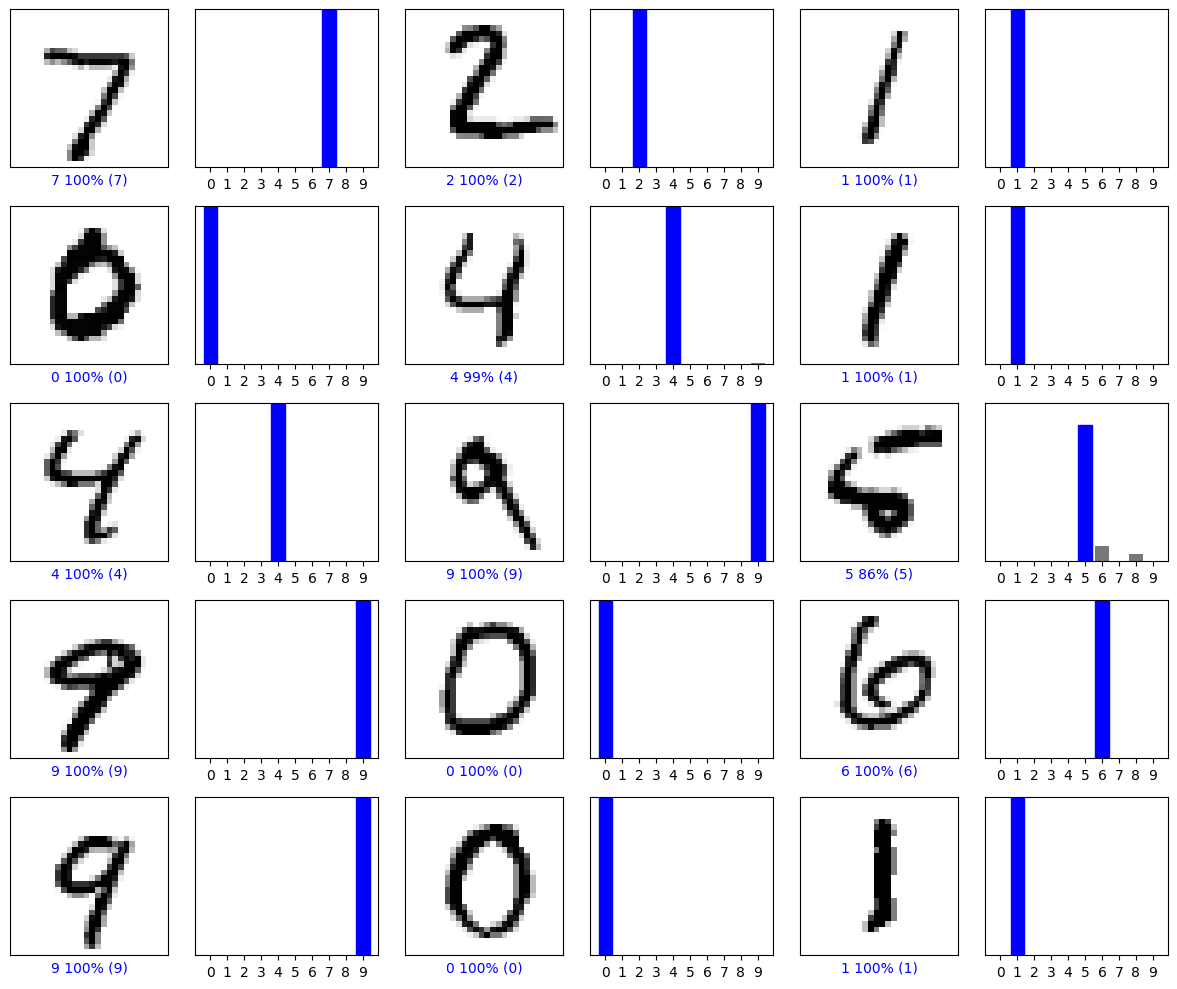

In [18]:
pred = mod.predict(test_images)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred[i], test_labels.argmax(axis=1))
plt.tight_layout()
plt.show()

## Modelo Convolucional

O modelo à seguir utiliza convolução aliado â multicamadas com a seguinte estrutura:

1. Camada de entrada (Flatten)
2. Camadas escondidas com:  
2.1. A  
2.2. A  
2.3. A  
2.4. A  
2.5. A  
2.6. A  
3. Camada de saída - Softmax

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


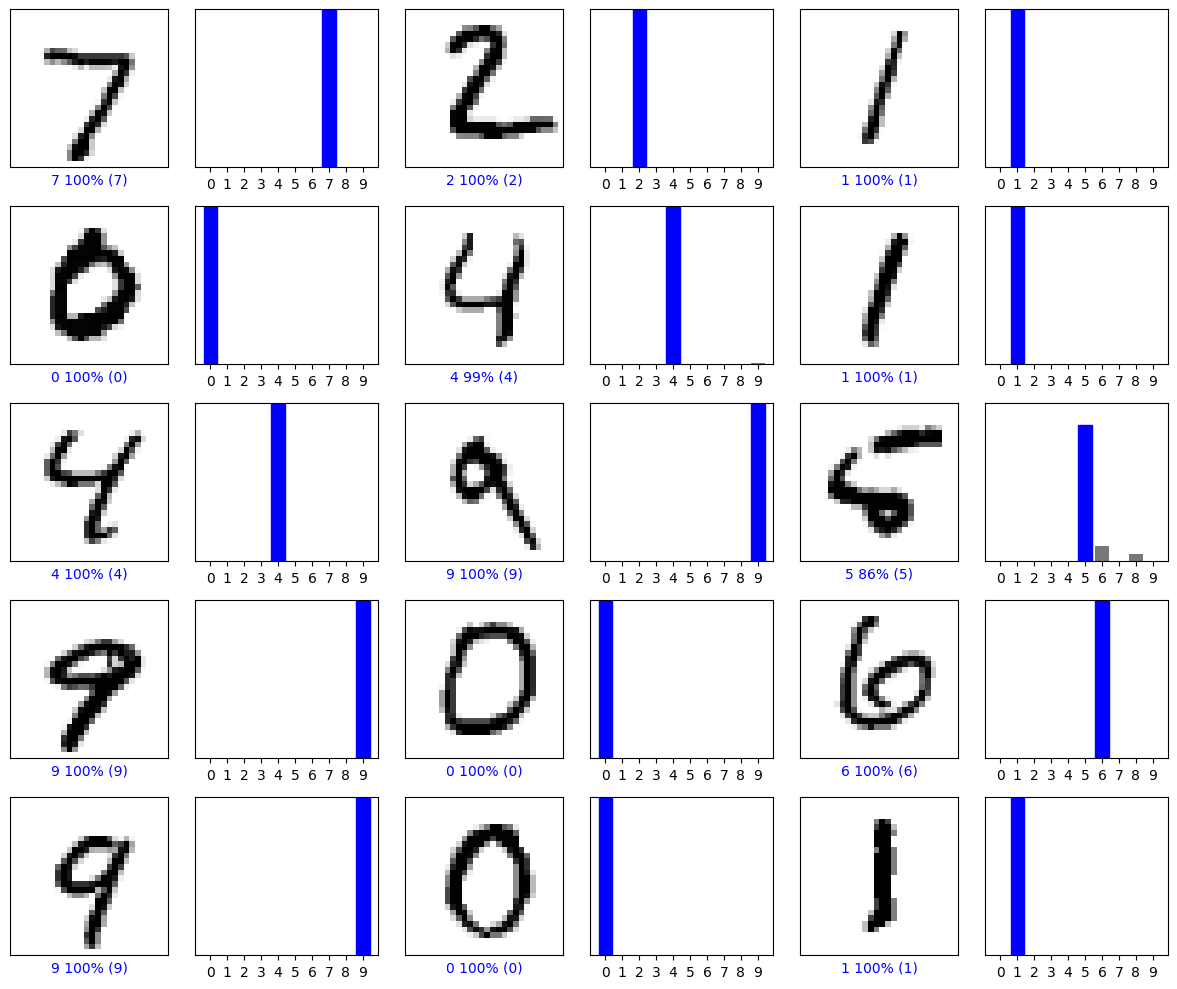

In [15]:
# Testando arquitetura - Todos os valores sao arbitrarios
conv_cfg = {
    'conv1': {'filters': 32, 'kernel': (3, 3)},
    'conv2': {'filters': 64, 'kernel': (3, 3)},
    'conv3': {'filters': 128, 'kernel': (3, 3)}
}

pool_cfg = {
    'pool1': (2, 2),
    'pool2': (2, 2)
}

cnn_mod = build_cnn_mod(conv_cfg, pool_cfg)
cnn_mod.summary()
cnn_mod.fit(x=train_images, y=train_labels, epochs=5, batch_size=32, verbose=0)
test_loss, test_acc = cnn_mod.evaluate(test_images, test_labels)
print(f'Acuracia dessa joça: {round(test_acc*100, 2)}%')
print(f'Loss dessa joça: {round(test_loss, 2)}')

# Testando predicao
rnd_idxs = np.random.choice(test_images.shape[0], 10, replace=False)
predictions = cnn_mod.predict(test_images)
plt.figure(figsize=(20, 4))
for i, idx in enumerate(rnd_idxs):
    plt.subplot(2, 10, i+1)
    plot_image(idx, predictions[idx], test_labels, test_images)
    plt.subplot(2, 10, i+11)
    plot_value_array(idx, predictions[idx], test_labels.argmax(axis=1))

plt.show()
del rnd_idxs

/home/rafflezs/Projetos/Atividades-Mestrado-ICMC/DeepLearning/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: The total size of the tensor must be unchanged. Received: input_shape=(128,), target_shape=(28, 28, 1)